# Exploring the NWM Reanalysis dataset

## Download a timeseries of netcdf files from s3, then plot the streamflow at one ComID 

In [1]:
from reanalysis import *
import pandas as pd
import os
import xarray as xr
from glob import glob
from time import time

%matplotlib inline

C:\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


### Download 2 years worth of data in 12 hour intervals

In [2]:
start_date = '2016-10-05'
end_date = '2016-10-15'
freq = "1H"

In [3]:
s3paths = get_reanalysis_paths(start_date, end_date, freq)

In [4]:
len(s3paths)

241

In [5]:
st = time()

s3download_parallel(s3paths, 'data_aws')
    
print(round((time()-st), 2), 'seconds to download')

85.5 seconds to download


## Begin exploration

In [6]:
start = time()

In [9]:
comid = 8785685
files = glob('data_aws/*')
assert len(files) == len(s3paths), 'Downloading error'

In [10]:
all_data = xr.open_mfdataset(files)
all_data

<xarray.Dataset>
Dimensions:         (feature_id: 2729077, reference_time: 1, time: 241)
Coordinates:
  * reference_time  (reference_time) datetime64[ns] 2016-10-01
  * feature_id      (feature_id) int32 101 179 181 ... 1180001803 1180001804
  * time            (time) datetime64[ns] 2016-10-05 ... 2016-10-15
Data variables:
    streamflow      (time, feature_id) float64 dask.array<shape=(241, 2729077), chunksize=(1, 2729077)>
    q_lateral       (time, feature_id) float64 dask.array<shape=(241, 2729077), chunksize=(1, 2729077)>
    velocity        (time, feature_id) float64 dask.array<shape=(241, 2729077), chunksize=(1, 2729077)>
    qSfcLatRunoff   (time, feature_id) float64 dask.array<shape=(241, 2729077), chunksize=(1, 2729077)>
    qBucket         (time, feature_id) float64 dask.array<shape=(241, 2729077), chunksize=(1, 2729077)>
    qBtmVertRunoff  (time, feature_id) float64 dask.array<shape=(241, 2729077), chunksize=(1, 2729077)>
Attributes:
    featureType:                timeSe

In [12]:
df = all_data.sel(feature_id=comid)['streamflow'].to_dataframe().drop(columns=['feature_id'])

In [13]:
df.head()

,streamflow
time,
2016-10-05 00:00:00,15.14
2016-10-05 01:00:00,14.96
2016-10-05 02:00:00,14.79
2016-10-05 03:00:00,14.62
2016-10-05 04:00:00,14.46


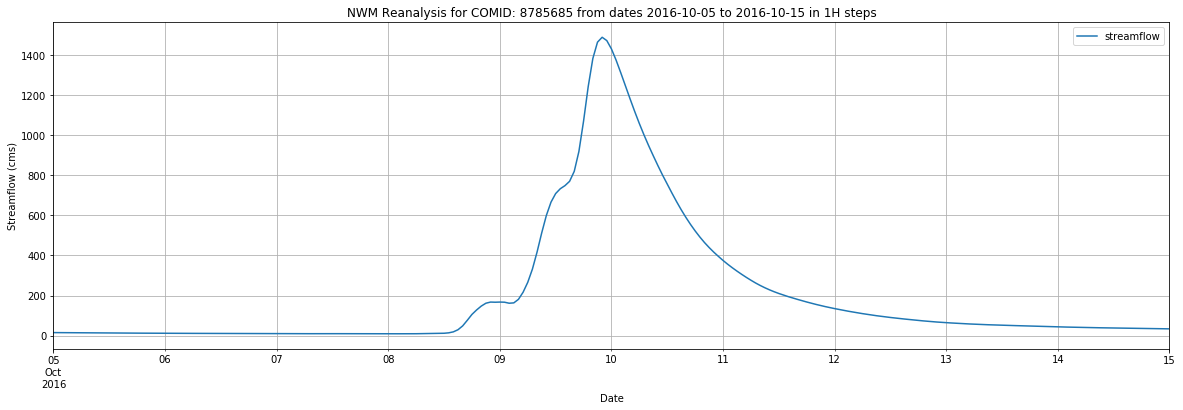

In [14]:
plotReanalysis(df, comid, freq)

In [15]:
print(round((time()-start), 2), 'seconds to access', sum([os.path.getsize(f) for f in files])/1e9, 'GB of data and produce a time series plot')

325.07 seconds to access 3.934458218 GB of data and produce a time series plot


# End